# Imports

In [1]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from scipy.stats import kendalltau
from cdlib import algorithms, evaluation
from matplotlib.colors import rgb2hex

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'karateclub', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


# Load data

In [2]:
data_df = pd.read_csv("../data/large.in", sep=" ", index_col=None, header=None, names=["source", "target"])

print(data_df.head())

   source  target
0       1       2
1       1       3
2       1       4
3       1       5
4       1       6


# Create networkit graph object

In [3]:
g = nk.Graph(directed=True)

for row in data_df[["source", "target"]].to_records(index=False).tolist():
    g.addEdge(row[0], row[1], addMissing=True)
    
g.removeNode(0)

# Question 3.1

In [4]:
print("Number of directed edges: ", g.numberOfEdges())

Number of directed edges:  1731653


# Question 3.2

In [5]:
print("Number of users(nodes) in the network: ", g.numberOfNodes())

Number of users(nodes) in the network:  279630


# Question 3.2

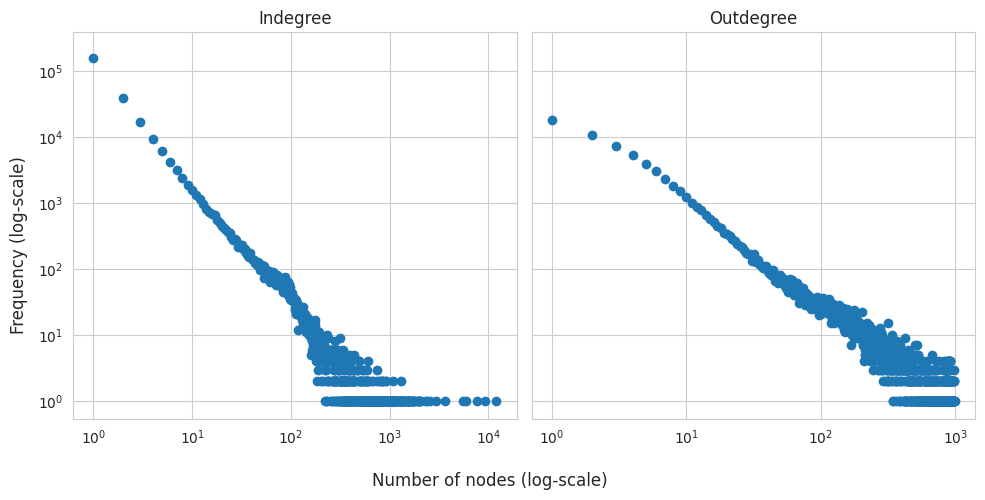

In [11]:
indegree_counts = np.unique([g.degreeIn(node_id) for node_id in g.iterNodes()], return_counts=True)
outdegree_counts = np.unique([g.degreeOut(node_id) for node_id in g.iterNodes()], return_counts=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, tight_layout=True)

ax[0].scatter(indegree_counts[0], indegree_counts[1])
ax[1].scatter(outdegree_counts[0], outdegree_counts[1])

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_yscale("log")

fig.supxlabel("Number of nodes (log-scale)")
fig.supylabel("Frequency (log-scale)")

ax[0].title.set_text("Indegree")
ax[1].title.set_text("Outdegree")

plt.savefig("../images/large_degree_distribution")
plt.show()

# Question 3.4

In [7]:
scc = nk.components.StronglyConnectedComponents(g)
scc.run()

print(f"Number of strongly connected components: ", scc.numberOfComponents())

Number of strongly connected components:  240113


In [8]:
wcc = nk.components.WeaklyConnectedComponents(g)
wcc.run()

print(f"Number of weakly connected components: ", wcc.numberOfComponents())

Number of weakly connected components:  6863


In [9]:
largest_scc_nodes = scc.getComponents()[tuple(sorted(scc.getComponentSizes().items(), key=lambda item: item[1], reverse=True))[0][0]]
largest_scc = nk.graphtools.subgraphFromNodes(g, largest_scc_nodes)

print(f"Number of nodes in largest strongly connected component: ", largest_scc.numberOfNodes())
print(f"Number of edges in largest strongly connected component: ", largest_scc.numberOfEdges())

Number of nodes in largest strongly connected component:  34826
Number of edges in largest strongly connected component:  799102


# Question 3.5

For how to handle directionality, refer https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html

In [10]:
print("Average local clustering coefficient: ", nk.globals.clustering(g))

Average local clustering coefficient:  0.08429601320246678


# Question 3.6

In [13]:
# largest_wcc_nodes = np.random.choice(wcc.getComponents()[tuple(sorted(wcc.getComponentSizes().items(), key=lambda item: item[1], reverse=True))[0][0]], size=1000)
# largest_wcc = nk.graphtools.subgraphFromNodes(g, largest_wcc_nodes)

# APSP = nk.distance.APSP(largest_wcc) 
# APSP.run()

# distance_counts = np.unique(APSP.getDistances(), return_counts=True)

In [14]:
# plt.figure(figsize=(5,5))

# plt.bar(distance_counts[0][:-1], distance_counts[1][:-1], align="center")

# plt.yscale("log")

# plt.xlabel("Distance between nodes")
# plt.ylabel("Frequency (log-scaled)")

# plt.show()